<a href="https://colab.research.google.com/github/AnastasiyaKrokhina/Co-Crystal-Prediction-Master/blob/main/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0_%D0%B4%D0%BB%D1%8F_NSBI_SRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import math 
from matplotlib import pyplot as plt
from google.colab import drive
import seaborn as sns
import numpy as np
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
SRA = pd.read_csv("/content/drive/My Drive/SraRunInfo.csv")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


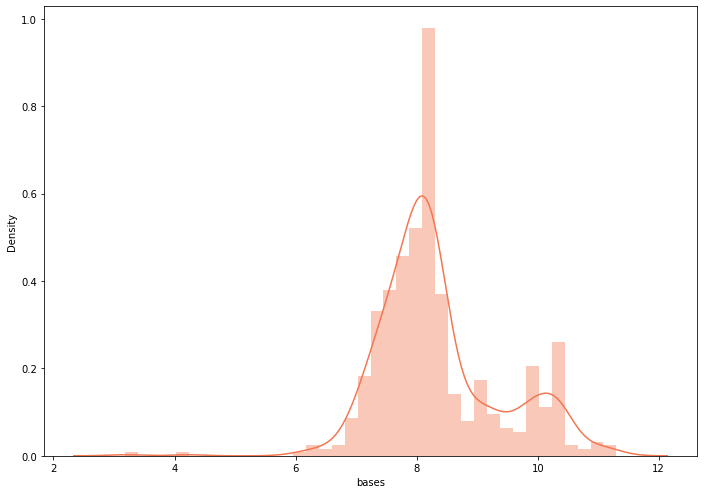

In [ ]:
sns.distplot(np.log10(SRA.bases), color=(0.95381595, 0.46373781, 0.31769923))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


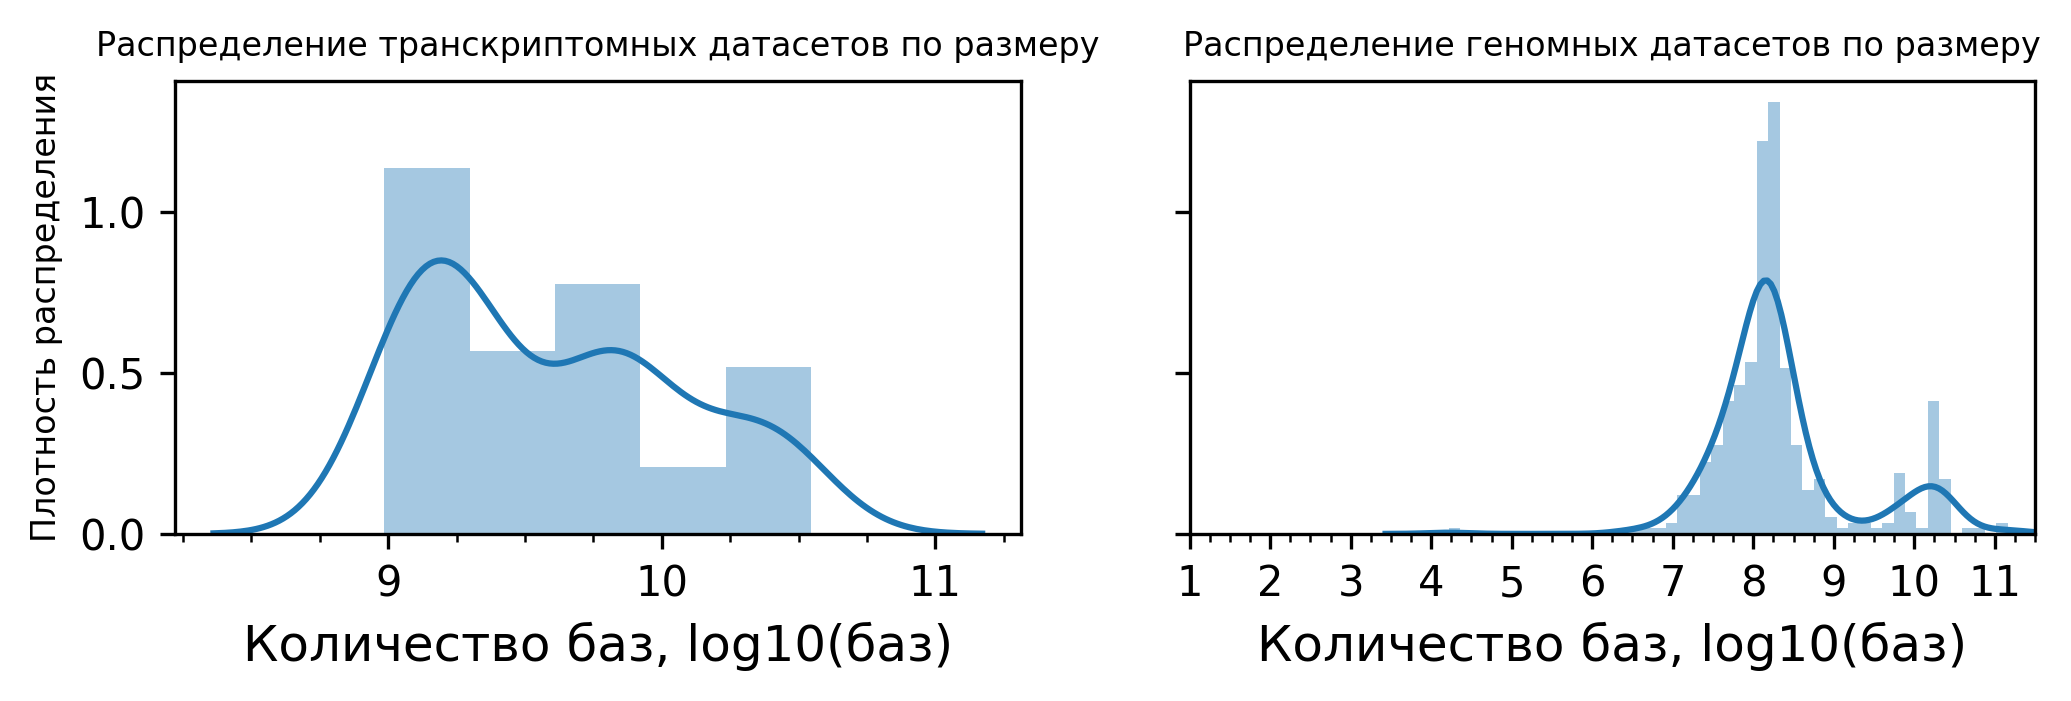

In [ ]:
fig, axs = plt.subplots(nrows=1, 
                        ncols=2, 
                        sharey=True, 
                        figsize=(8, 2), 
                        dpi=300
                        )
axs = axs.flatten()

sns.distplot(np.log10(SRA[SRA.LibrarySource == 'TRANSCRIPTOMIC'].bases), 
             ax=axs[0]
             )

sns.distplot(np.log10(SRA[SRA.LibrarySource == 'GENOMIC'].bases),  
             ax=axs[1],
             ) 
axs[0].set_xlabel( "Количество баз, log10(баз)" , size = 12 )
axs[1].set_xlabel( "Количество баз, log10(баз)" , size = 12 ) 
axs[0].set_ylabel( "Плотность распределения" , size = 8 )
  
axs[0].set_title( "Распределение транскриптомных датасетов по размеру" , size = 8 )
axs[1].set_title( "Распределение геномных датасетов по размеру" , size = 8 )
from matplotlib.ticker import MultipleLocator

axs[0].xaxis.set_major_locator(MultipleLocator(1))
axs[0].xaxis.set_minor_locator(MultipleLocator(0.25))

axs[1].xaxis.set_major_locator(MultipleLocator(1))

axs[1].xaxis.set_minor_locator(MultipleLocator(0.25))
axs[1].set_xlim(1, 11.5)

plt.show()

#График2

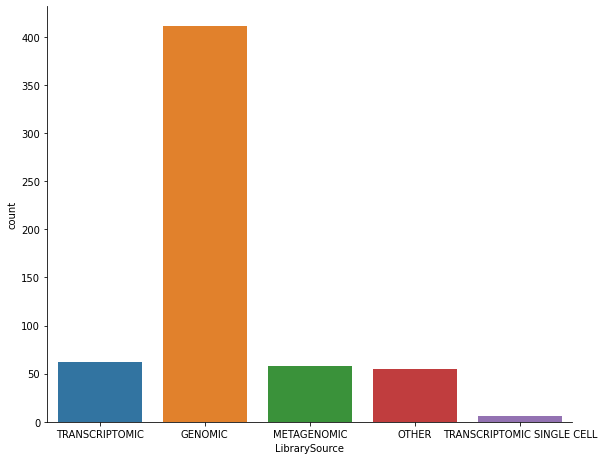

In [ ]:
sns.catplot(x="LibrarySource", 
            kind="count",
            data=SRA,
            height=6.5, aspect=1.3)
plt.show()

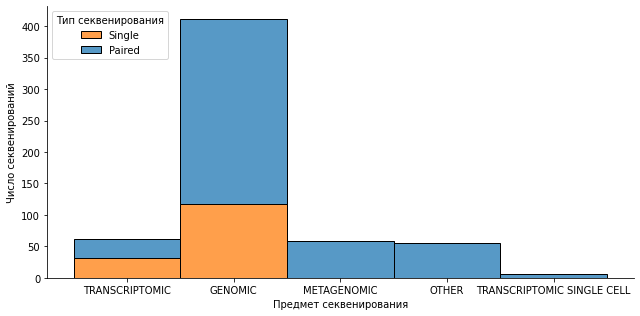

In [ ]:
sns.displot(SRA, 
            x="LibrarySource", 
            hue="LibraryLayout", 
            multiple="stack",
            height=4.5, aspect=2,
            legend = False
            )

plt.xlabel("Предмет секвенирования")
plt.ylabel("Число секвенирований")
plt.legend(title='Тип секвенирования', loc='upper left', labels=['Single','Paired'])
#plt.title("title")

Text(10.366321855709877, 0.5, 'Число секвенирований')

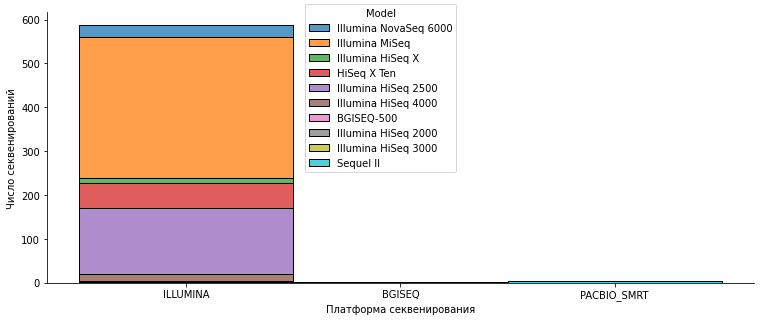

In [ ]:
ax = sns.displot(SRA, 
            x="Platform", # Platform	Model
            hue="Model", 
            multiple="stack",
            # palette="rocket",
            height=4.5, aspect=2.4
            )
sns.move_legend(ax, 
                "upper center",

)
plt.xlabel("Платформа секвенирования")
plt.ylabel("Число секвенирований")

In [ ]:
sns.displot(SRA, 
            x="LibrarySource", 
            hue="Platform", 
            multiple="stack",
            height=4.5, aspect=2
            )

plt.xlabel("Предмет секвенирования")
plt.ylabel("Число секвенирований")
plt.legend(title='Платформа', loc='upper right', labels=['PACBIO SMRT', 'ABI SOLID', 'BGISEQ', 'Illumina'])

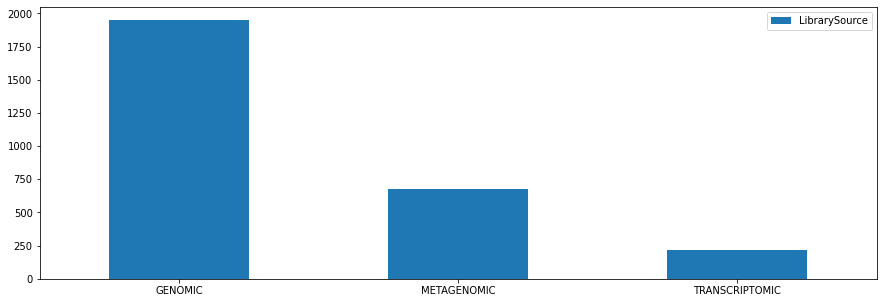

In [ ]:
pd.DataFrame(SRA['LibrarySource'].value_counts()).plot.bar(figsize=(15, 5), rot=0, label=0)

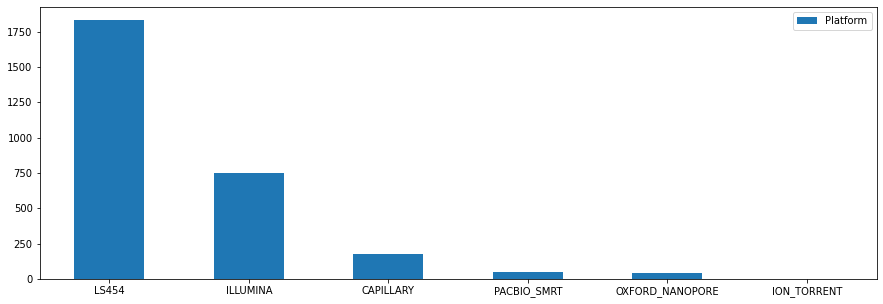

In [ ]:
pd.DataFrame(SRA['Platform'].value_counts()).plot.bar(figsize=(15, 5), rot=0, label=0)

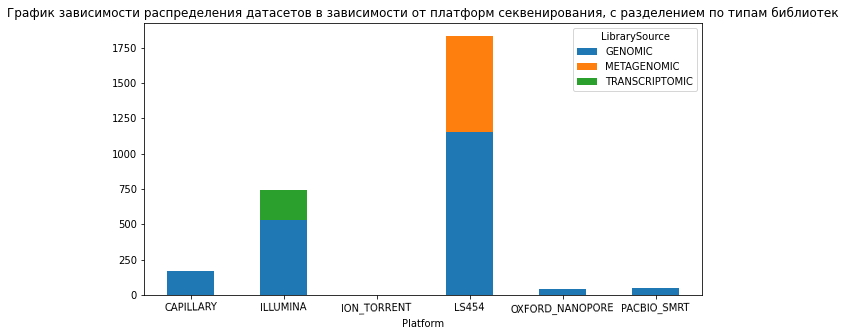

In [ ]:
df2 = SRA.groupby(['Platform', 'LibrarySource'])['Platform'].count().unstack('LibrarySource')
df2.plot(kind='bar', 
         stacked=True, 
         figsize=(10, 5), 
         rot=True,
         title='График зависимости распределения датасетов в зависимости от платформ секвенирования, с разделением по типам библиотек')

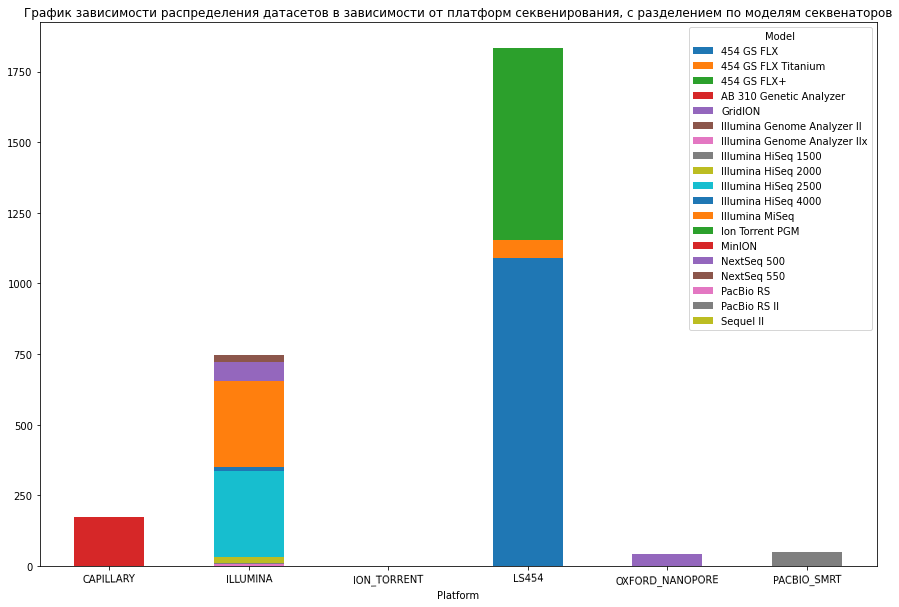

In [ ]:
df2 = SRA.groupby(['Platform', 'Model'])['Platform'].count().unstack('Model')
df2.plot(kind='bar', 
         stacked=True, 
         figsize=(15, 10), 
         rot=True,
         title='График зависимости распределения датасетов в зависимости от платформ секвенирования, с разделением по моделям секвенаторов')

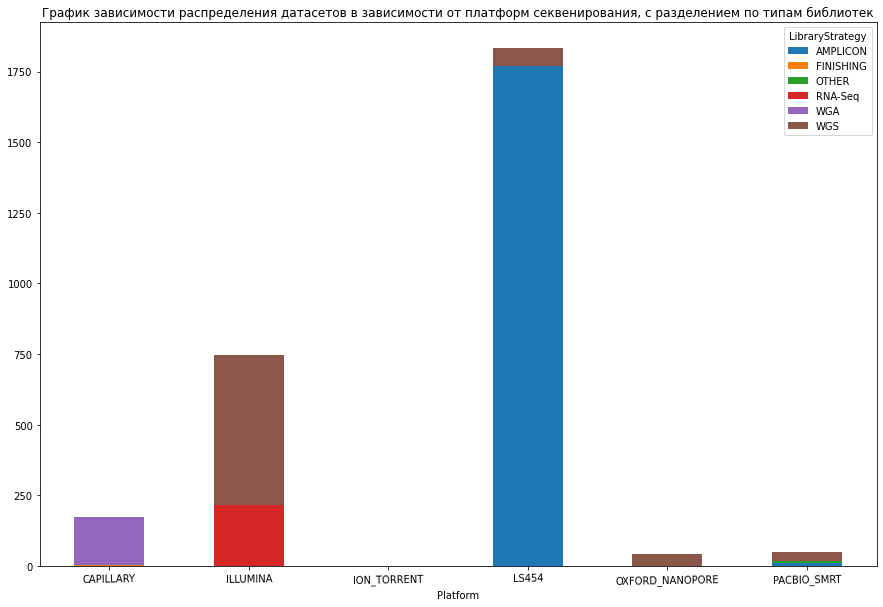

In [ ]:
df2 = SRA.groupby(['Platform', 'LibraryStrategy'])['Platform'].count().unstack('LibraryStrategy')
df2.plot(kind='bar', 
         stacked=True, 
         figsize=(15, 10), 
         rot=True,
         title='График зависимости распределения датасетов в зависимости от платформ секвенирования, с разделением по типам библиотек')

In [ ]:
sciname = SRA.ScientificName.value_counts()
sciname = sciname[sciname.values > 5]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


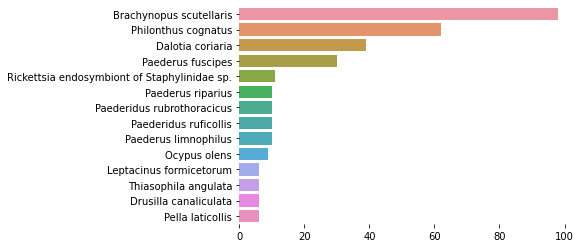

In [ ]:
sns.barplot(sciname.values, sciname.index, orient = 'h')

sns.despine(left=True, bottom=True)

In [ ]:
CenterName = SRA['CenterName'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


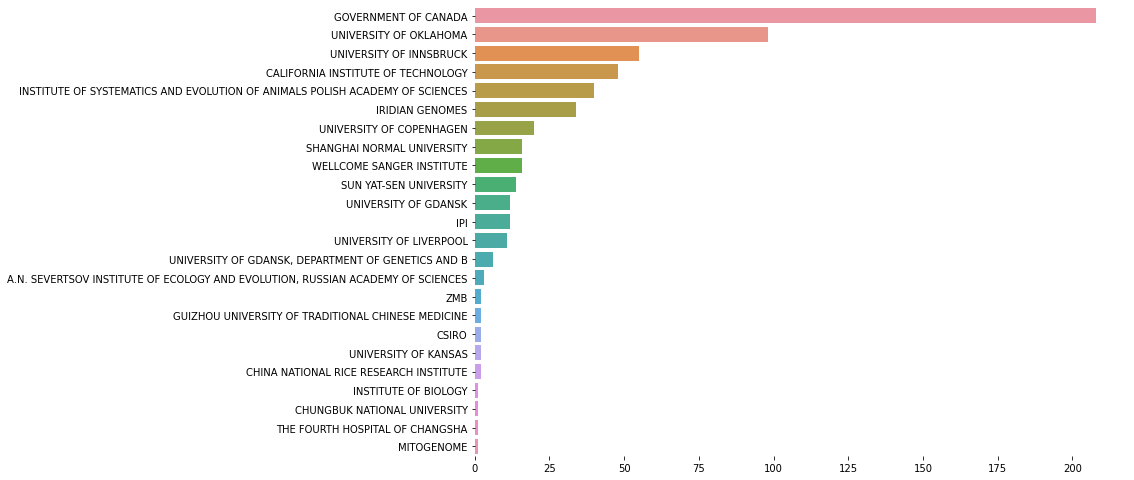

In [ ]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27



sns.barplot(CenterName.values, CenterName.index, orient = 'h')

sns.despine(left=True, bottom=True)

In [ ]:
CenterName

GOVERNMENT OF CANADA                                                              208
UNIVERSITY OF OKLAHOMA                                                             98
UNIVERSITY OF INNSBRUCK                                                            55
CALIFORNIA INSTITUTE OF TECHNOLOGY                                                 48
INSTITUTE OF SYSTEMATICS AND EVOLUTION OF ANIMALS POLISH ACADEMY OF SCIENCES       40
IRIDIAN GENOMES                                                                    34
UNIVERSITY OF COPENHAGEN                                                           20
SHANGHAI NORMAL UNIVERSITY                                                         16
WELLCOME SANGER INSTITUTE                                                          16
SUN YAT-SEN UNIVERSITY                                                             14
UNIVERSITY OF GDANSK                                                               12
IPI                                                   